In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import pylab as py
import scipy.stats as sps
import statsmodels.api as sm
import time
from google.colab import files
from prettytable import PrettyTable

In [ ]:
def inverse(n):
    U=sps.uniform.rvs(size=n)
    X=U**2
    plt.hist(X, bins='auto')
    plt.savefig("histogram.png")
    files.download("histogram.png")
    plt.show()
    return X

In [ ]:
def quantile(data, q):
    quantile_point = np.quantile(data, q)
    return quantile_point
def quantile_pi(data):
    return data**2

In [ ]:
def gene_hist_qq(n):
    q = np.array([i*0.01 for i in range(1, 101)]) # list all the quantiles, from 0.01~1.0
    q_pi = quantile_pi(q)
    stats = inverse(n=10**5)
    q_sample = np.quantile(stats, q)
    plt.scatter(q_pi, q_sample)
    plt.plot([0, 1], [0, 1], color = "black")
    plt.ylabel('samples')
    plt.xlabel('pi')
    plt.savefig("qqplot.png")
    files.download("qqplot.png")
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

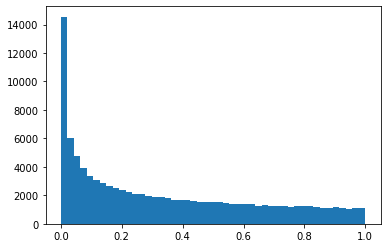

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

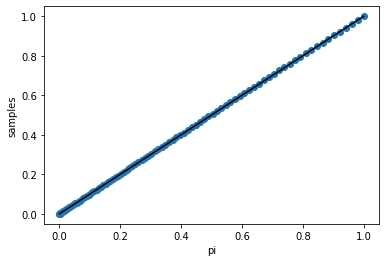

In [ ]:
gene_hist_qq(n=10**5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

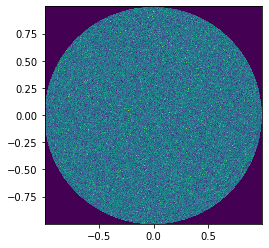

U(0,1) variables required per sample: 2
wall clock time per sample: 8.853261470794678e-08


In [ ]:
# uniform variable u_1 and u_2
n = 10**7
time_start = time.time()
u1 = np.random.rand(n)
u2 = np.random.rand(n)

# transform into x, y
rho = np.sqrt(u1)
theta = 2*np.pi*u2
x = rho*np.cos(theta)
y = rho*np.sin(theta)
time_end = time.time()

# create bins
x_bins = np.linspace(np.min(x), np.max(x), 1000)
y_bins = np.linspace(np.min(y), np.max(y), 1000)
  
# plot
plt.hist2d(x, y, bins =[x_bins, y_bins])
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("18.png")
files.download("18.png")
plt.show()
print('U(0,1) variables required per sample:', 2)
print('wall clock time per sample:', (time_end-time_start)/n)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

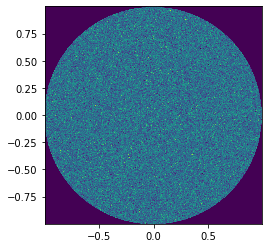

U(0,1) variables required per sample: 2.546705
wall clock time per sample: 6.331427693367005e-06


In [ ]:
n = 10**7
sample = np.zeros(2*n).reshape(2,n)
count = 0

time_start = time.time()
for i in range(n):
  # generate uniform distribution
  U = np.random.rand()

  # generate Y
  count += 1
  Y = np.random.rand(2)*2 - 1 # recenter Unif[0,1]^2->Unif[-1,1]^2

  # compute pi/(K pi')
  while (Y[0]**2+Y[1]**2) > 1:
    # if reject, generate another sample
    Y = np.random.rand(2)*2 - 1
    count += 1
  sample[:,i] = Y
time_end = time.time()
# Creating bins
x_bins = np.linspace(np.min(sample[0,:]), np.max(sample[0,:]), 1000)
y_bins = np.linspace(np.min(sample[1,:]), np.max(sample[1,:]), 1000)
# Creating plot
plt.hist2d(sample[0,:], sample[1,:], bins =[x_bins, y_bins])
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("19.png")
files.download("19.png")
plt.show()
print('U(0,1) variables required per sample:', count*2/n)
print('wall clock time per sample:', (time_end-time_start)/n)

In [ ]:
ms = [i for i in range(-3, 4)]
sigmas = [i*0.25 for i in range(1, 21)]
values = np.zeros((len(ms),len(sigmas)))
n = 10**4

# print results in a table
x = PrettyTable()
x.field_names = ["m", "sigma", "variance"]

# compute f(y)pi(y)/pi'(y)
def compute(Y, m, sigma):
  # pi(y)/pi'(y)*N
  w = sigma*np.exp(-Y**2/2+(Y-m)**2/(2*sigma**2))/n
  Y[Y<=2] = 0 # f(y)=0 for y<=2
  Y[Y>2] = 1 # f(y)=1 for y>2
  return sum(Y*w)

# compute important sampling results
for i in range(len(ms)):
  for j in range(len(sigmas)):
    # compute estimator for 200 times to get variance
    l = np.zeros(500)
    for k in range(len(l)):
      Y = np.random.normal(ms[i], sigmas[j], n)
      l[k] = compute(Y, ms[i], sigmas[j])
    values[i][j] = np.var(l)
    x.add_row([ms[i], sigmas[j], values[i][j]]) 

In [ ]:
print(x)

+----+-------+------------------------+
| m  | sigma |        variance        |
+----+-------+------------------------+
| -3 |  0.25 |          0.0           |
| -3 |  0.5  |          0.0           |
| -3 |  0.75 |          0.0           |
| -3 |  1.0  |          0.0           |
| -3 |  1.25 |  0.002299567718870495  |
| -3 |  1.5  | 0.00013101088118314336 |
| -3 |  1.75 | 2.560668204638306e-05  |
| -3 |  2.0  | 1.0364012201849705e-05 |
| -3 |  2.25 | 4.577351421417621e-06  |
| -3 |  2.5  | 3.625739910172798e-06  |
| -3 |  2.75 | 2.741047918803314e-06  |
| -3 |  3.0  | 2.0021073495415896e-06 |
| -3 |  3.25 | 1.8775511884983565e-06 |
| -3 |  3.5  | 1.6396582452610242e-06 |
| -3 |  3.75 | 1.7873830307913963e-06 |
| -3 |  4.0  | 1.502840218401158e-06  |
| -3 |  4.25 | 1.2922330200486712e-06 |
| -3 |  4.5  | 1.462102090763188e-06  |
| -3 |  4.75 | 1.3171373261858807e-06 |
| -3 |  5.0  | 1.434992766387211e-06  |
| -2 |  0.25 |          0.0           |
| -2 |  0.5  |          0.0           |


In [ ]:
n = 10**5

# generate Y~N(0,1)
Y = np.random.normal(0,1,n)

# compute q(Y)
q = np.exp(-Y**2/2)/(np.sqrt(2*np.pi))

# compute p(Y)
p = np.exp(-abs(Y)**3)

# estimator for Z
Z = np.sum(p/q)/n
print('normalizing constant Z=', Z)

normalizing constant Z= 1.7854804580944723


In [ ]:
ms = [i for i in range(-3, 4)]
sigmas = [i*0.25 for i in range(1, 21)]
values = np.zeros((len(ms),len(sigmas)))
n = 10**4

# print results in a table
xx = PrettyTable()
xx.field_names = ["m", "sigma", "variance"]

# compute f(y)pi(y)/pi'(y)
def compute(Y, m, sigma):
  # pi(y)/pi'(y)*N
  w = sigma*np.exp(-Y**2/2+(Y-m)**2/(2*sigma**2))
  w = w/sum(w)
  Y[Y<=2] = 0 # f(y)=0 for y<=2
  Y[Y>2] = 1 # f(y)=1 for y>2
  return sum(Y*w)

# compute important sampling results
for i in range(len(ms)):
  for j in range(len(sigmas)):
    # compute estimator for 200 times to get variance
    ll = np.zeros(500)
    for k in range(len(ll)):
      Y = np.random.normal(ms[i], sigmas[j], n)
      ll[k] = compute(Y, ms[i], sigmas[j])
    values[i][j] = np.var(ll)
    xx.add_row([ms[i], sigmas[j], values[i][j]]) 

In [ ]:
print(xx)

+----+-------+------------------------+
| m  | sigma |        variance        |
+----+-------+------------------------+
| -3 |  0.25 |          0.0           |
| -3 |  0.5  |          0.0           |
| -3 |  0.75 |          0.0           |
| -3 |  1.0  | 0.0016956900452999926  |
| -3 |  1.25 | 0.0013318276579447983  |
| -3 |  1.5  | 0.0001069090994623606  |
| -3 |  1.75 | 2.7565650258425784e-05 |
| -3 |  2.0  | 9.780902273103804e-06  |
| -3 |  2.25 | 5.367491225282639e-06  |
| -3 |  2.5  | 3.864386006757438e-06  |
| -3 |  2.75 | 2.997656512672805e-06  |
| -3 |  3.0  | 2.496771969247076e-06  |
| -3 |  3.25 | 2.103942043223055e-06  |
| -3 |  3.5  | 1.7749674944906491e-06 |
| -3 |  3.75 | 1.7429642626060763e-06 |
| -3 |  4.0  | 1.7874412630827224e-06 |
| -3 |  4.25 | 1.672131620282196e-06  |
| -3 |  4.5  | 1.592357884091321e-06  |
| -3 |  4.75 | 1.5652690666393054e-06 |
| -3 |  5.0  | 1.5088341055708532e-06 |
| -2 |  0.25 |          0.0           |
| -2 |  0.5  |          0.0           |
